In [4]:
import tensorflow as tf
from tensorflow.keras import Model, layers, regularizers, initializers
import numpy as np
from matplotlib import pyplot as plt
import random

random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

In [6]:
from sklearn.model_selection import train_test_split

(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_trainval.shape, x_test.shape, y_trainval.shape, y_test.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size = 1/6, shuffle = True,
                                                     stratify = y_trainval, random_state = 34)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 121s 1us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)
(41666, 32, 32, 3) (8334, 32, 32, 3) (41666, 1) (8334, 1)


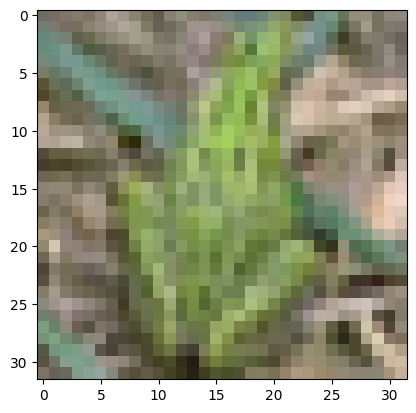

In [9]:
plt.imshow(x_train[0])

In [10]:
num_features = np.prod(x_train[0].shape)
num_classes = 10

x_train, x_valid, x_test = x_train.reshape(-1, num_features), x_valid.reshape(-1, num_features), x_test.reshape(-1, num_features)
x_train, x_valid, x_test = x_train.astype('float32') / 255, x_valid.astype('float32') / 255, x_test.astype('float32') / 255

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),
                            tf.keras.layers.Dense(10)])

model.compile(optimizer = 'SGD',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
batch_size = 256
epochs = 100

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)

result = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), callbacks=[callback],
                   batch_size = batch_size, epochs = epochs)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1784 - loss: 2.2344 - val_accuracy: 0.2838 - val_loss: 2.0321
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2951 - loss: 1.9971 - val_accuracy: 0.3261 - val_loss: 1.9221
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3277 - loss: 1.9070 - val_accuracy: 0.3468 - val_loss: 1.8667
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3503 - loss: 1.8580 - val_accuracy: 0.3595 - val_loss: 1.8291
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3660 - loss: 1.8227 - val_accuracy: 0.3692 - val_loss: 1.7997
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3770 - loss: 1.7939 - val_accuracy: 0.3752 - val_loss: 1.7755
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3854 - loss: 1.7696 - val_accuracy: 0.3828 - val_loss: 1.7549
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3940 - loss: 1.7483 - 

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5732 - loss: 1.2219 - val_accuracy: 0.5052 - val_loss: 1.3909


In [13]:
def loss_curves(result, title=None):
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train', 'validation'], loc='best')

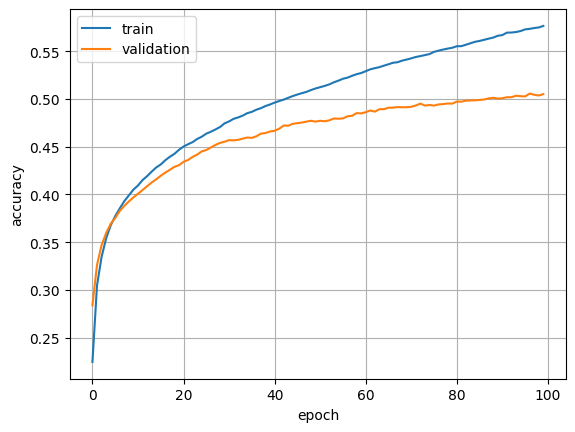

In [14]:
loss_curves(result)

In [15]:
model_sig = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'sigmoid'),
                                tf.keras.layers.Dense(256, activation = 'sigmoid'),
                                tf.keras.layers.Dense(10)])

model_sig.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                 metrics = ['accuracy'])

In [16]:
result = model_sig.fit(x_train, y_train, validation_data = (x_valid, y_valid), batch_size = batch_size,
                       epochs = epochs)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1100 - loss: 2.3482 - val_accuracy: 0.1615 - val_loss: 2.2928
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1581 - loss: 2.2913 - val_accuracy: 0.1977 - val_loss: 2.2842
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1819 - loss: 2.2828 - val_accuracy: 0.2127 - val_loss: 2.2754
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2013 - loss: 2.2740 - val_accuracy: 0.2213 - val_loss: 2.2661
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2149 - loss: 2.2647 - val_accuracy: 0.2282 - val_loss: 2.2562
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2279 - loss: 2.2547 - val_accuracy: 0.2347 - val_loss: 2.2452
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2367 - loss: 2.2436 - val_accuracy: 0.2406 - val_loss: 2.2330
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2452 - loss: 2.2313 - 

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3727 - loss: 1.7863 - val_accuracy: 0.3597 - val_loss: 1.7865


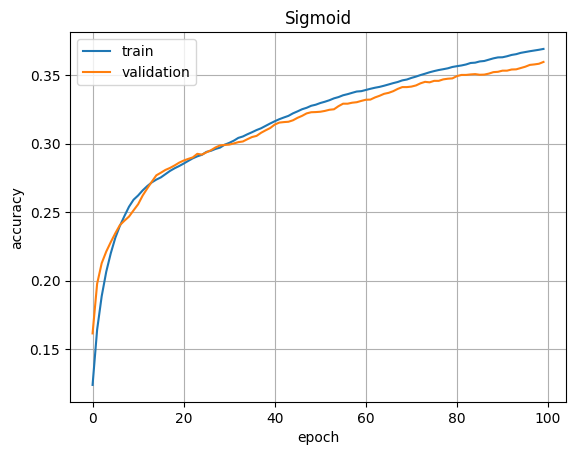

In [17]:
loss_curves(result, 'Sigmoid')

In [18]:
model_bn = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(256, activation = 'relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(10)])

model_bn.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

In [19]:
result = model_bn.fit(x_train, y_train, validation_data = (x_valid, y_valid), batch_size = batch_size, epochs = epochs)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2769 - loss: 2.1643 - val_accuracy: 0.3278 - val_loss: 1.8918
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4100 - loss: 1.6943 - val_accuracy: 0.3882 - val_loss: 1.7012
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4436 - loss: 1.5956 - val_accuracy: 0.4041 - val_loss: 1.6622
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4654 - loss: 1.5349 - val_accuracy: 0.4208 - val_loss: 1.6325
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4826 - loss: 1.4887 - val_accuracy: 0.4260 - val_loss: 1.6170
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4935 - loss: 1.4516 - val_accuracy: 0.4286 - val_loss: 1.6022
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5043 - loss: 1.4194 - val_accuracy: 0.4335 - val_loss: 1.5972
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5147 - loss: 1.3911 - 

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8934 - loss: 0.4012 - val_accuracy: 0.4144 - val_loss: 2.3046
Epoch 100/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8980 - loss: 0.3895 - val_accuracy: 0.4282 - val_loss: 2.2373


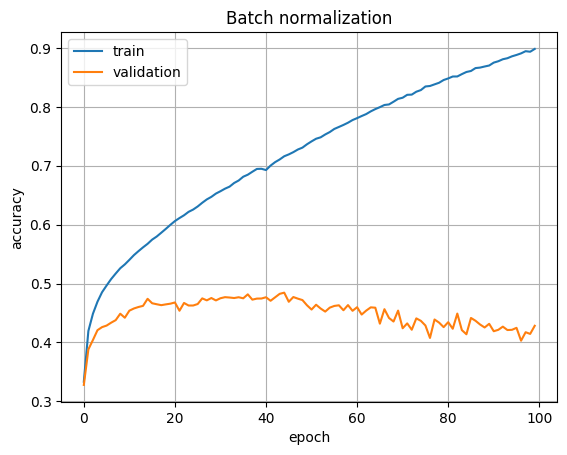

In [20]:
loss_curves(result, 'Batch normalization')

In [24]:
model_reg = tf.keras.Sequential([tf.keras.layers.Dense(128, kernel_initializer = initializers.GlorotNormal(),
                                                      kernel_regularizer = regularizers.l2(0.01),
                                                      activation = 'relu'),
                                tf.keras.layers.Dense(256, kernel_initializer = initializers.GlorotNormal(),
                                                     kernel_regularizer = regularizers.l2(0.01),
                                                     activation = 'relu'),
                                tf.keras.layers.Dense(10)])

model_reg.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                 metrics = ['accuracy'])

In [25]:
model_reg.compile(optimizer = 'SGD', loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])

result = model_reg.fit(x_train, y_train, validation_data = (x_valid, y_valid), batch_size = batch_size,
                      epochs = epochs)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1844 - loss: 6.3180 - val_accuracy: 0.2694 - val_loss: 5.9351
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2868 - loss: 5.8479 - val_accuracy: 0.3089 - val_loss: 5.6005
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3254 - loss: 5.5312 - val_accuracy: 0.3327 - val_loss: 5.3268
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3434 - loss: 5.2664 - val_accuracy: 0.3457 - val_loss: 5.0832
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3553 - loss: 5.0288 - val_accuracy: 0.3539 - val_loss: 4.8609
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3644 - loss: 4.8108 - val_accuracy: 0.3602 - val_loss: 4.6562
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3728 - loss: 4.6091 - val_accuracy: 0.3667 - val_loss: 4.4662
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3797 - loss: 4.4220 - 

Epoch 100/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4910 - loss: 1.6257 - val_accuracy: 0.4789 - val_loss: 1.6453


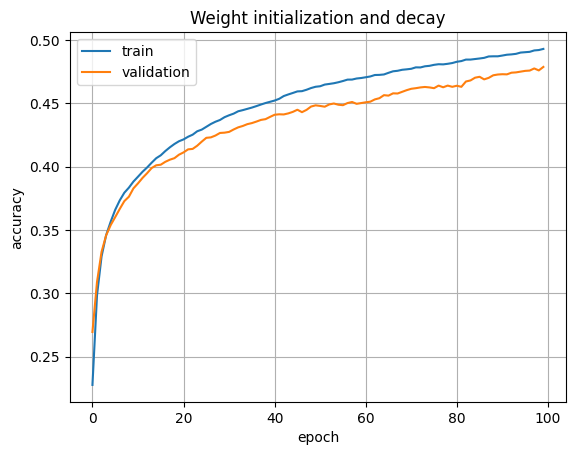

In [26]:
loss_curves(result, 'Weight initialization and decay')

In [27]:
#drop out
model_do = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'relu'),
                                tf.keras.layers.Dropout(rate = 0.1),
                               tf.keras.layers.Dense(256, activation = 'relu'),
                               tf.keras.layers.Dropout(rate = 0.1),
                               tf.keras.layers.Dense(10)])

model_do.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])

result = model_do.fit(x_train, y_train, validation_data = (x_valid, y_valid), batch_size = batch_size,
                     epochs = epochs)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1741 - loss: 2.2302 - val_accuracy: 0.2846 - val_loss: 2.0253
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2740 - loss: 2.0278 - val_accuracy: 0.3197 - val_loss: 1.9317
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3049 - loss: 1.9459 - val_accuracy: 0.3404 - val_loss: 1.8741
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3296 - loss: 1.8900 - val_accuracy: 0.3524 - val_loss: 1.8345
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3422 - loss: 1.8566 - val_accuracy: 0.3648 - val_loss: 1.8022
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3498 - loss: 1.8304 - val_accuracy: 0.3699 - val_loss: 1.7781
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3627 - loss: 1.8041 - val_accuracy: 0.3764 - val_loss: 1.7552
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3703 - loss: 1.7791 - 

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4900 - loss: 1.4495 - val_accuracy: 0.4820 - val_loss: 1.4668
Epoch 51/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4933 - loss: 1.4451 - val_accuracy: 0.4798 - val_loss: 1.4629
Epoch 52/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4915 - loss: 1.4423 - val_accuracy: 0.4814 - val_loss: 1.4606
Epoch 53/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4937 - loss: 1.4332 - val_accuracy: 0.4824 - val_loss: 1.4553
Epoch 54/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4948 - loss: 1.4346 - val_accuracy: 0.4825 - val_loss: 1.4545
Epoch 55/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5004 - loss: 1.4295 - val_accuracy: 0.4858 - val_loss: 1.4532
Epoch 56/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4976 - loss: 1.4253 - val_accuracy: 0.4873 - val_loss: 1.4470
Epoch 57/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5010 - loss: 1.4198 - val_a

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5440 - loss: 1.2822 - val_accuracy: 0.5134 - val_loss: 1.3724
Epoch 100/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5472 - loss: 1.2833 - val_accuracy: 0.5130 - val_loss: 1.3673


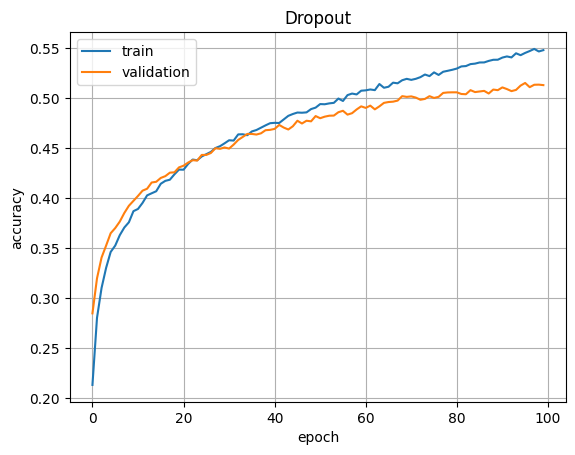

In [28]:
loss_curves(result, 'Dropout')

In [30]:
model_adam = tf.keras.Sequential([tf.keras.layers.Dense(128, activation = 'relu'),
                                 tf.keras.layers.Dense(256, activation = 'relu'),
                                 tf.keras.layers.Dense(10)])

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_adam.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])

result = model_adam.fit(x_train, y_train, validation_data = (x_valid, y_valid), batch_size = batch_size,
                       epochs = epochs)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2505 - loss: 2.0499 - val_accuracy: 0.3590 - val_loss: 1.7644
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3803 - loss: 1.7424 - val_accuracy: 0.3956 - val_loss: 1.6759
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4112 - loss: 1.6562 - val_accuracy: 0.4203 - val_loss: 1.6124
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4297 - loss: 1.6029 - val_accuracy: 0.4383 - val_loss: 1.5752
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4469 - loss: 1.5559 - val_accuracy: 0.4521 - val_loss: 1.5442
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4601 - loss: 1.5189 - val_accuracy: 0.4575 - val_loss: 1.5281
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4702 - loss: 1.4897 - val_accuracy: 0.4587 - val_loss: 1.5158
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4801 - loss: 1.4610 - 

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5980 - loss: 1.1212 - val_accuracy: 0.4926 - val_loss: 1.4746
Epoch 51/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6019 - loss: 1.1147 - val_accuracy: 0.4922 - val_loss: 1.4754
Epoch 52/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6036 - loss: 1.1051 - val_accuracy: 0.4948 - val_loss: 1.4759
Epoch 53/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6065 - loss: 1.0940 - val_accuracy: 0.4918 - val_loss: 1.4915
Epoch 54/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6117 - loss: 1.0889 - val_accuracy: 0.4894 - val_loss: 1.4928
Epoch 55/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6111 - loss: 1.0898 - val_accuracy: 0.4856 - val_loss: 1.4984
Epoch 56/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6148 - loss: 1.0850 - val_accuracy: 0.4884 - val_loss: 1.5006
Epoch 57/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6132 - loss: 1.0847 - val_a

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6499 - loss: 0.9794 - val_accuracy: 0.4708 - val_loss: 1.6673
Epoch 100/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6471 - loss: 0.9896 - val_accuracy: 0.4705 - val_loss: 1.6613


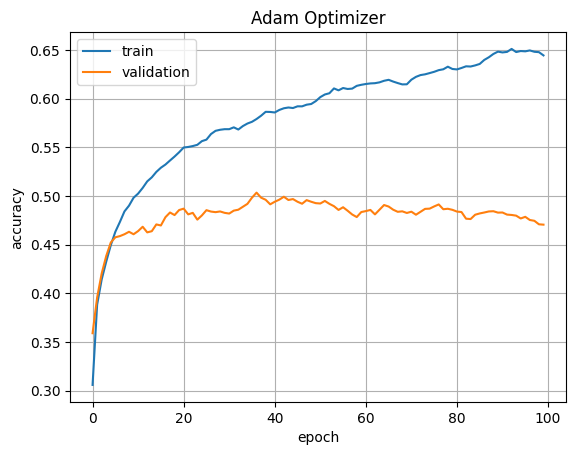

In [31]:
loss_curves(result, 'Adam Optimizer')